In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_film = pd.read_csv("df_film.csv")

In [3]:
df_top_genre = pd.read_csv("df_top_genre.csv").set_index("genre")

## Répartition du nombre de film par décénie (@Julien)

## Genre les plus représentés par décénie

Text(0.5, 1.0, 'Top 10 des genres par décénie')

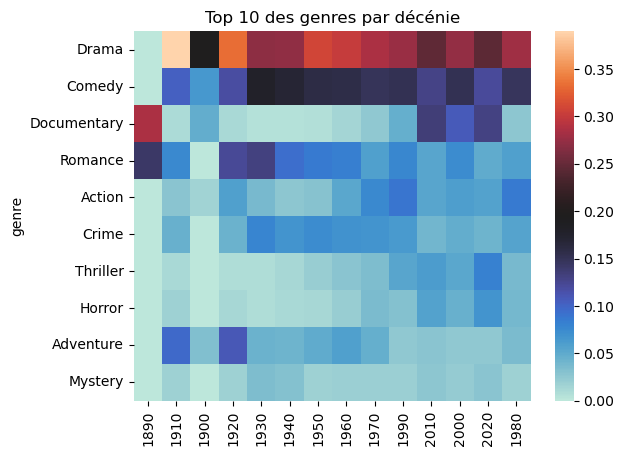

In [8]:
df_top_genre = df_top_genre.drop(columns = "0")
sns.heatmap(df_top_genre, cmap = "icefire")
plt.title("Top 10 des genres par décénie")

## Evolution de la durée des films 

### Avec des boxplot

Text(0.5, 1.0, 'Evolution de la durée des films par décénie')

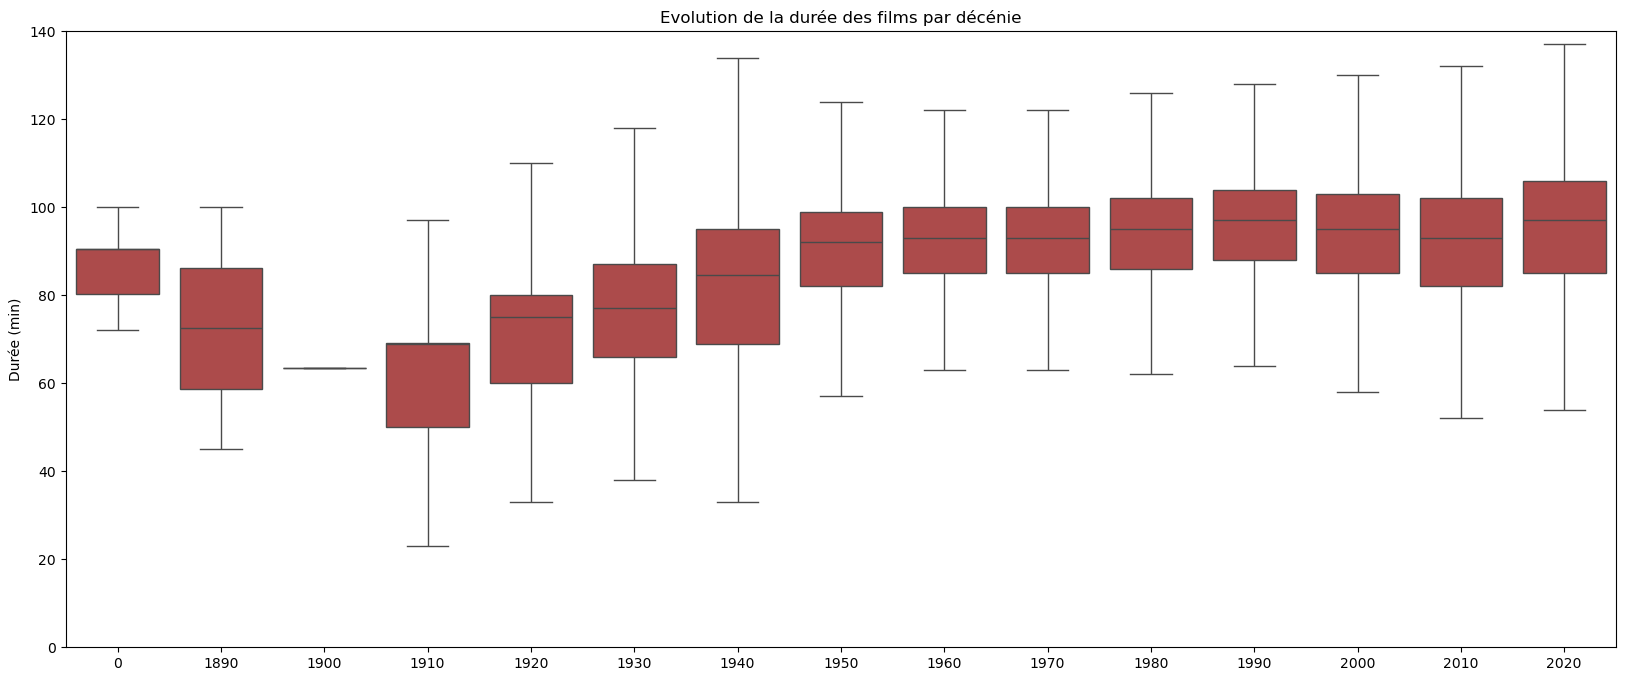

In [41]:
plt.figure(figsize = (20,8))
sns.boxplot(data=df_film, x="decenie", y="temps_minutes", showfliers=False, color = "#BC3B3B")
plt.ylim(0,140)
plt.ylabel("Durée (min)")
plt.xlabel("")
plt.title("Evolution de la durée des films par décénie")

### Avec un lineplot <3

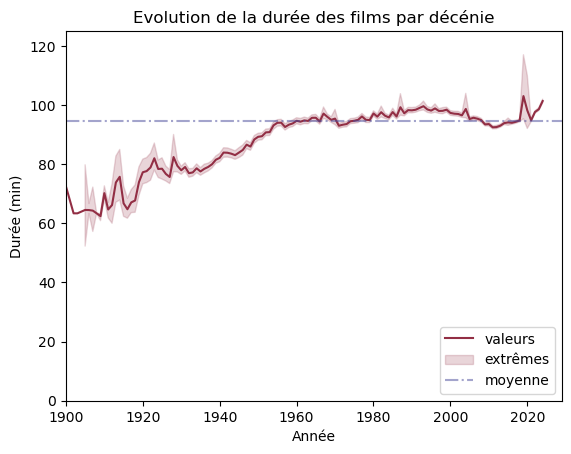

In [50]:
sns.lineplot(data = df_film, x = "année", y = "temps_minutes", color = "#922E44")
plt.xlim(1900, 2029)
plt.ylim(0,125)
moyenne = df_film['temps_minutes'].mean()
plt.axhline(moyenne, color='#494B9B', linestyle='-.', alpha = 0.5)
plt.ylabel("Durée (min)")
plt.xlabel("Année")
plt.title("Evolution de la durée des films par décénie")
plt.legend(["valeurs", "extrêmes", "moyenne"], loc = 'lower right')

### En scatter plot

Text(0.5, 1.0, 'Evolution de la durée des films par décénie')

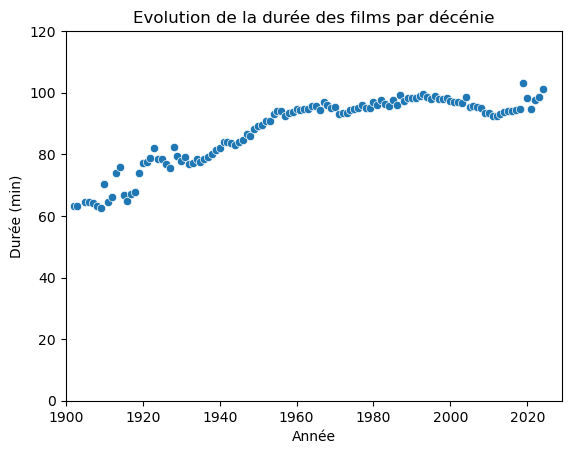

In [34]:
moyenne_annuelle =  df_film.groupby('année')['temps_minutes'].mean().reset_index()

sns.scatterplot(data = moyenne_annuelle, x = "année", y = "temps_minutes")
plt.xlim(1900, 2029)
plt.ylim(0,120)
plt.ylabel("Durée (min)")
plt.xlabel("Année")
plt.title("Evolution de la durée des films par décénie")

## Popularité (@Julien)

## Réalisateurs (@Julien)

# Données du CNC

### Selon la nationalité du film

Text(0.5, 1.0, 'Répartition des entrées selon la nationalité du film')

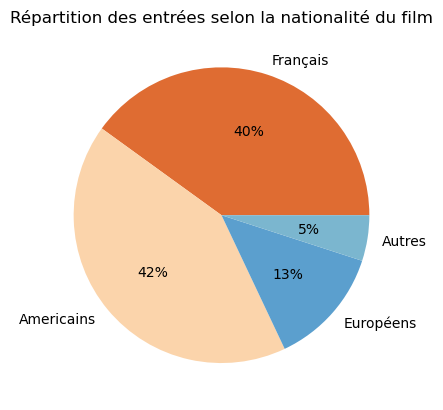

In [65]:
labels = 'Français', 'Americains', 'Européens', 'Autres'
sizes = [70.6, 74.1, 22.9, 8.8]

plt.pie(sizes, labels=labels, autopct = "%.0f%%", colors = ['#DF6C32', '#FBD4AB', '#5B9FCE', '#7BB6CF'])
plt.title("Répartition des entrées selon la nationalité du film")

### Selon le genre

Text(0.5, 1.0, 'Répartition des entrées selon le genre du film')

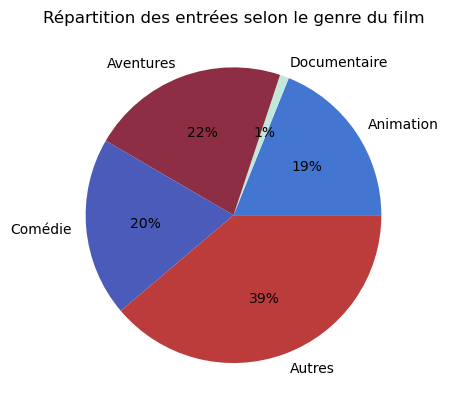

In [67]:
labels = 'Animation', 'Documentaire', 'Aventures', 'Comédie', 'Autres'
sizes = [18.9, 1, 21.7, 19.6, 38.8]

plt.pie(sizes, labels=labels, autopct = "%.0f%%", colors = ['#4376D0', '#C2E7DB', '#8D2E44', '#4A5BBA', '#BC3B3B'])
plt.title("Répartition des entrées selon le genre du film")